<a href="https://colab.research.google.com/github/charlie-aashutosh/Interview-Prep/blob/main/Data_Visualization_on_Indian_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as snr
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/content/indian movies.csv")

In [4]:
data.head(15)

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960,-,-,-,-,hindi
1,tt1702558,Nadir Khan,1968,-,-,-,-,urdu
2,tt0493437,Apna Sapna Money Money,2006,134 min,5.3,"1,892","Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987,-,2.2,20,-,urdu
4,tt0049595,Parivar,1956,-,7.4,21,"Comedy, Drama, Family",hindi
5,tt2930026,Humraah: The Traitor,2008,-,-,-,Thriller,hindi
6,tt6597160,Jacqueline I Am Coming,2019,112 min,7.9,16,Drama,hindi
7,tt0829459,A Mighty Heart,2007,108 min,6.6,"26,885","Biography, Drama, History",urdu
8,tt0154875,Midnight Mail,1939,-,-,-,Action,hindi
9,tt0364628,Raktalekha,1992,175 min,6.3,12,Drama,bengali


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50602 entries, 0 to 50601
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           50602 non-null  object
 1   Movie Name   50602 non-null  object
 2   Year         49041 non-null  object
 3   Timing(min)  50602 non-null  object
 4   Rating(10)   50602 non-null  object
 5   Votes        50602 non-null  object
 6   Genre        50602 non-null  object
 7   Language     50602 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


In [6]:
data['Votes']=pd.to_numeric(data['Votes'],errors='coerce')
data['Rating(10)']=pd.to_numeric(data['Rating(10)'],errors='coerce')

In [7]:
data['Timing(min)'].head(15)

0           -
1           -
2     134 min
3           -
4           -
5           -
6     112 min
7     108 min
8           -
9     175 min
10    138 min
11          -
12     90 min
13          -
14          -
Name: Timing(min), dtype: object

In [8]:
data['Timing(min)']=data['Timing(min)'].str.extract('(\d+)').astype(float)

In [9]:
data.dropna(subset=['Year','Votes','Rating(10)','Timing(min)'],inplace=True)

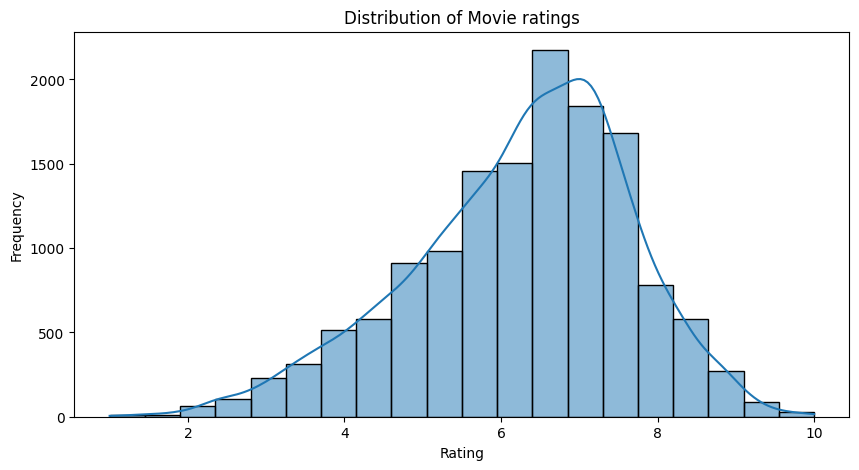

In [10]:
plt.figure(figsize=(10,5))
snr.histplot(data['Rating(10)'],bins=20,kde=True)
plt.title('Distribution of Movie ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

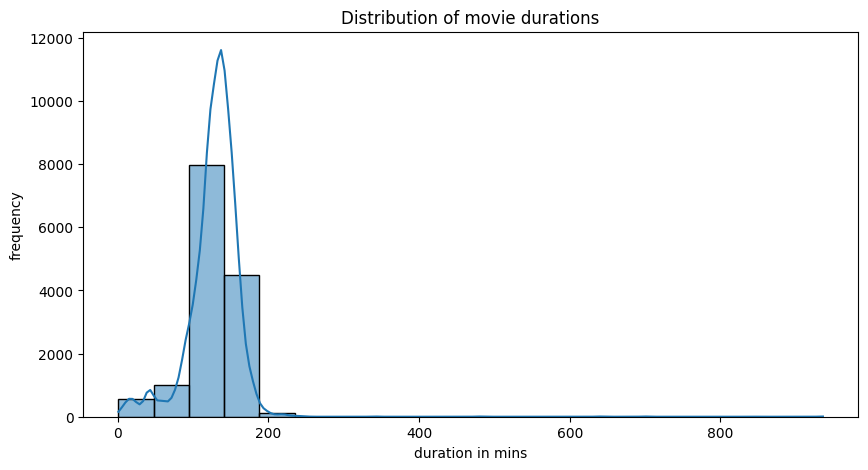

In [11]:
plt.figure(figsize=(10,5))
snr.histplot(data['Timing(min)'],bins=20,kde=True)
plt.title("Distribution of movie durations")
plt.xlabel("duration in mins")
plt.ylabel("frequency")
plt.show()

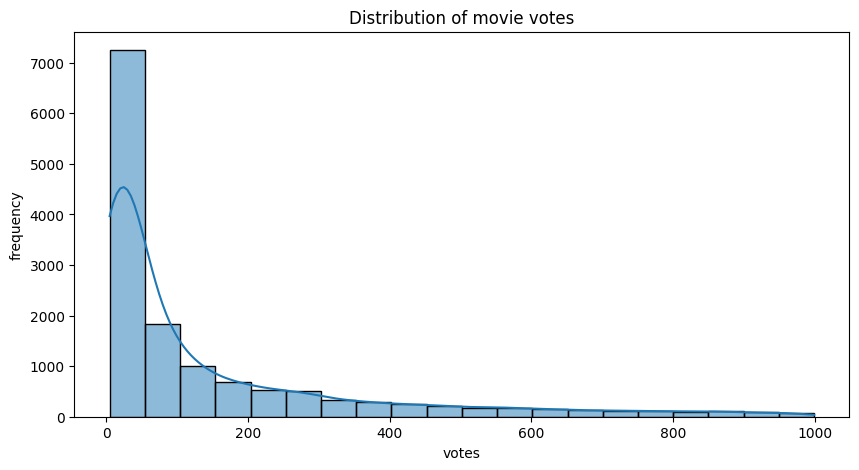

In [12]:
plt.figure(figsize=(10,5))
snr.histplot(data['Votes'],bins=20,kde=True)
plt.title("Distribution of movie votes")
plt.xlabel("votes")
plt.ylabel("frequency")
plt.show()

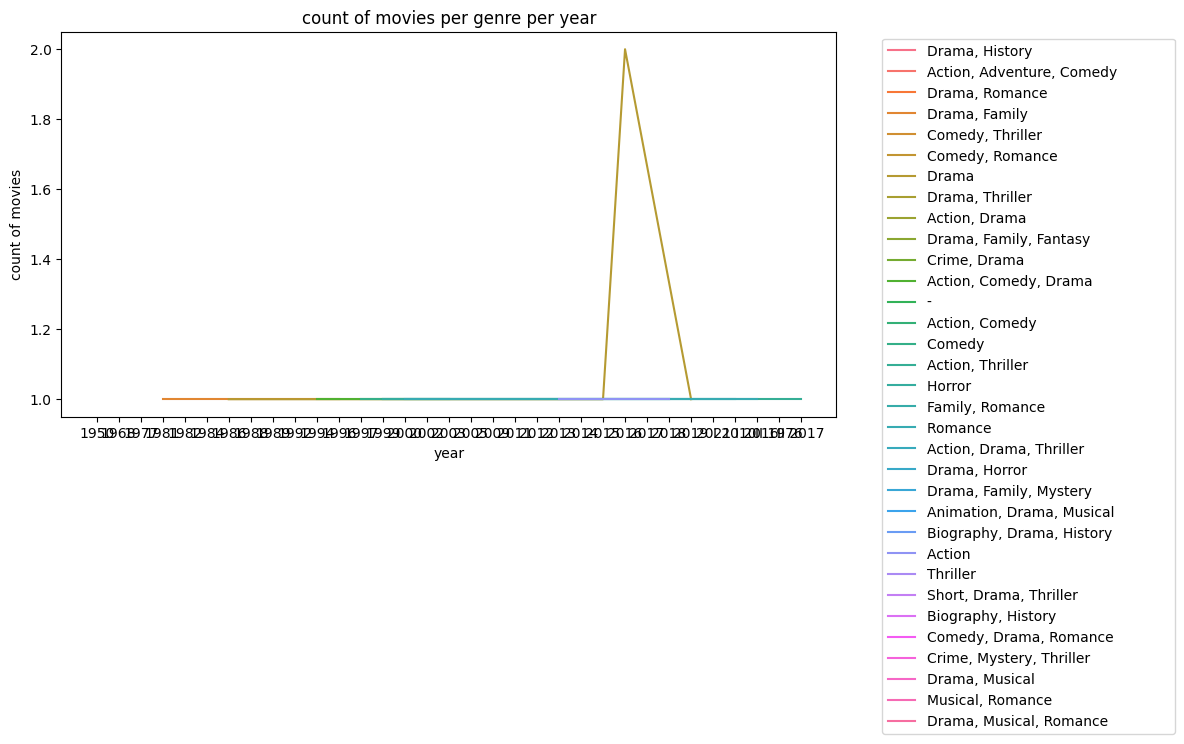

In [13]:
plt.figure(figsize=(10,5))
genre_year=data.iloc[0:50,:].groupby(['Year','Genre']).size().reset_index(name='count')
snr.lineplot(data=genre_year,x='Year',y='count',hue='Genre')
plt.title("count of movies per genre per year")
plt.xlabel("year")
plt.ylabel("count of movies")
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

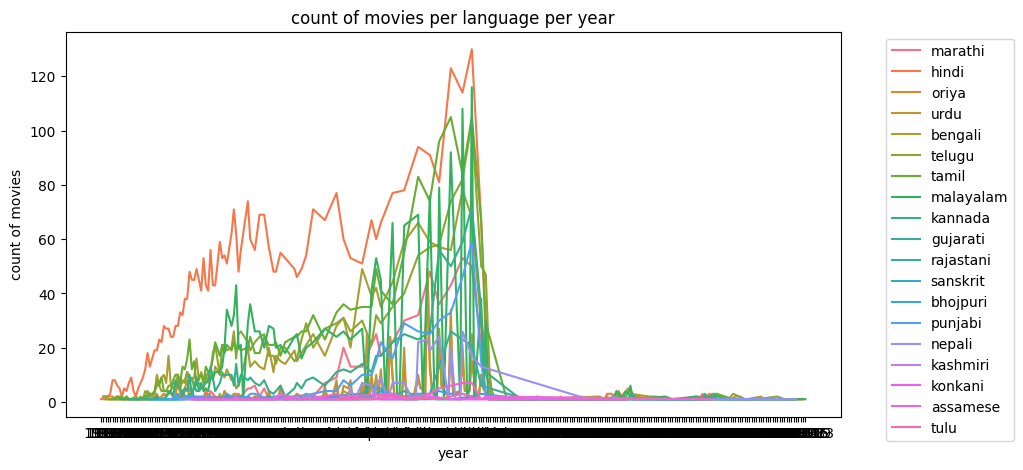

In [14]:
plt.figure(figsize=(10,5))
lang_year=data.groupby(['Year','Language']).size().reset_index(name='count')
snr.lineplot(data=lang_year,x='Year',y='count',hue='Language')
plt.title("count of movies per language per year")
plt.xlabel("year")
plt.ylabel("count of movies")
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

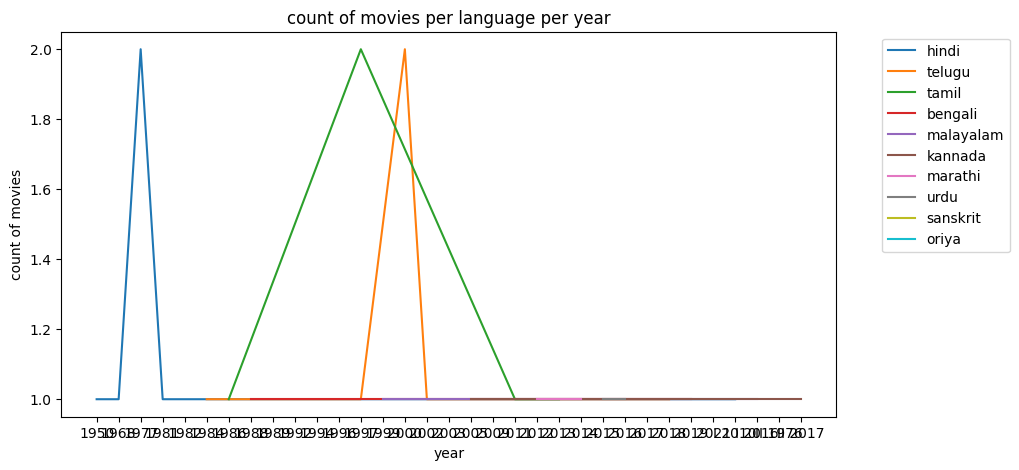

In [15]:
plt.figure(figsize=(10,5))
lang_year=data.iloc[0:50,:].groupby(['Year','Language']).size().reset_index(name='count')
snr.lineplot(data=lang_year,x='Year',y='count',hue='Language')
plt.title("count of movies per language per year")
plt.xlabel("year")
plt.ylabel("count of movies")
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

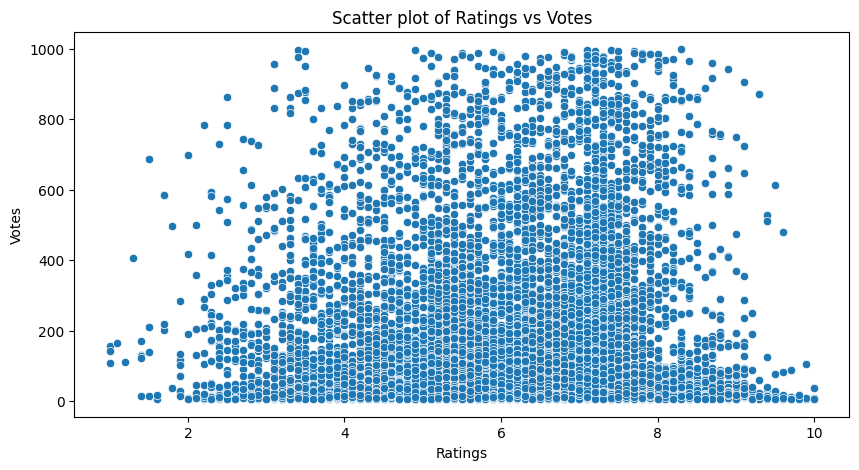

In [16]:
plt.figure(figsize=(10,5))
snr.scatterplot(data=data,x='Rating(10)',y='Votes')
plt.title("Scatter plot of Ratings vs Votes")
plt.xlabel("Ratings")
plt.ylabel("Votes")
plt.show()

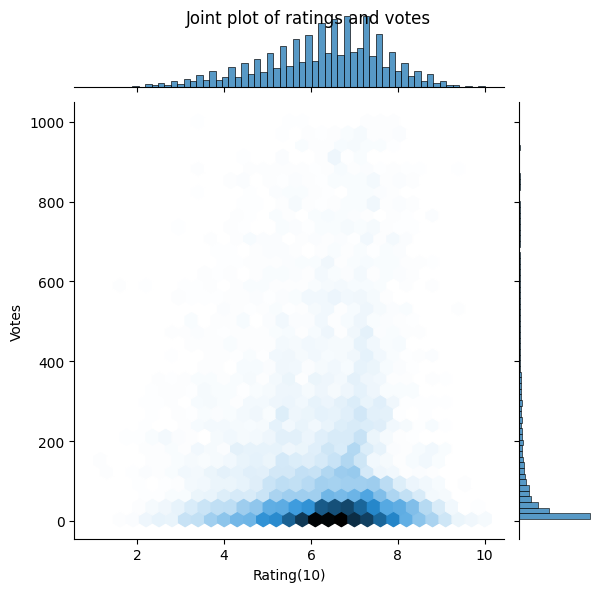

In [17]:
snr.jointplot(data=data,x='Rating(10)',y='Votes',kind='hex',gridsize=30)
plt.suptitle("Joint plot of ratings and votes")
plt.show()

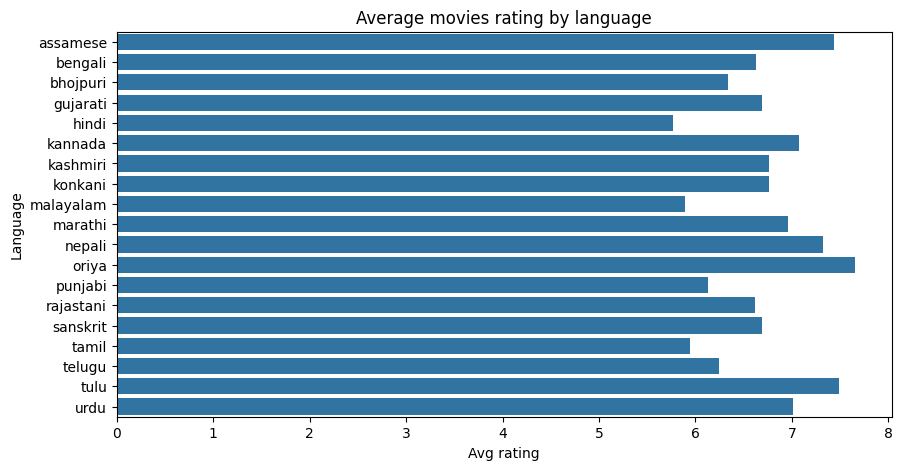

In [18]:
plt.figure(figsize=(10,5))
avg_rating=data.groupby('Language')['Rating(10)'].mean().reset_index()
snr.barplot(data=avg_rating,x='Rating(10)',y='Language')
plt.title("Average movies rating by language")
plt.xlabel("Avg rating")
plt.ylabel("Language")
plt.show()

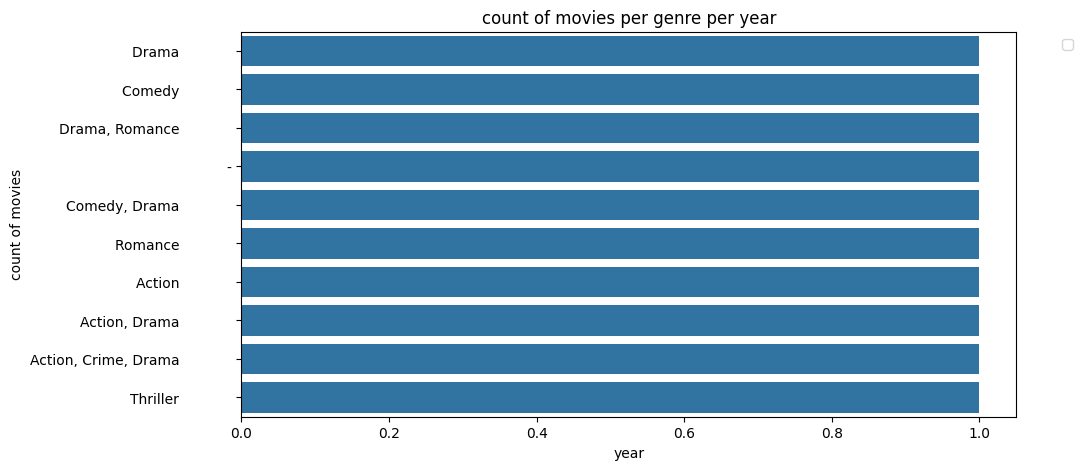

In [21]:
top_10_genres=data['Genre'].value_counts().head(10).index
top_10_df=data[data['Genre'].isin(top_10_genres)]

plt.figure(figsize=(10,5))
snr.countplot(data=top_10_genres)
plt.title("count of movies per genre per year")
plt.xlabel("year")
plt.ylabel("count of movies")
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

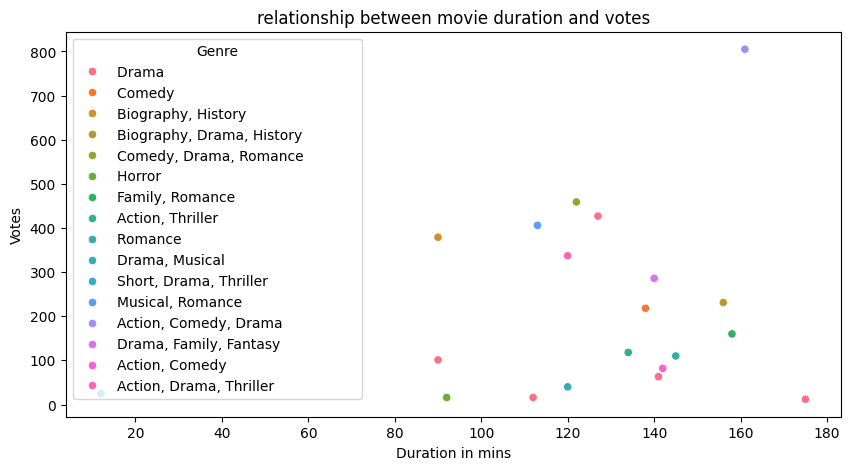

In [23]:
plt.figure(figsize=(10,5))
snr.scatterplot(data=data.iloc[0:20,:],x='Timing(min)',y='Votes',hue='Genre')
plt.title("relationship between movie duration and votes")
plt.xlabel("Duration in mins")
plt.ylabel("Votes")
plt.show()

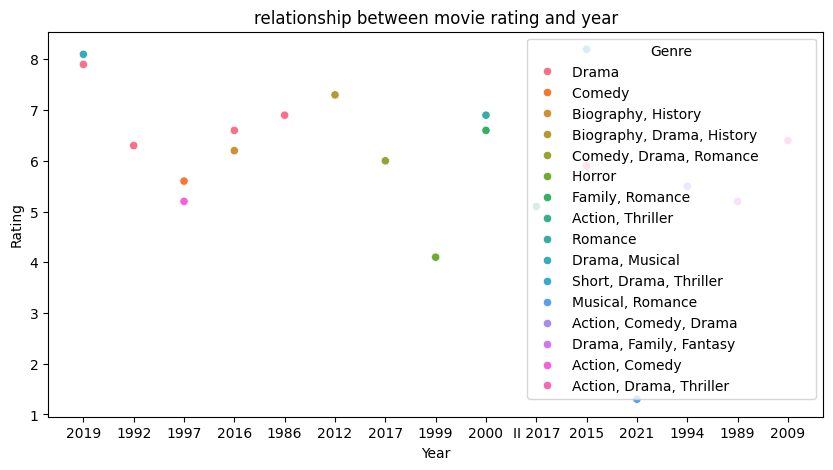

In [24]:
plt.figure(figsize=(10,5))
snr.scatterplot(data=data.iloc[0:20,:],x='Year',y='Rating(10)',hue='Genre')
plt.title("relationship between movie rating and year")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.show()

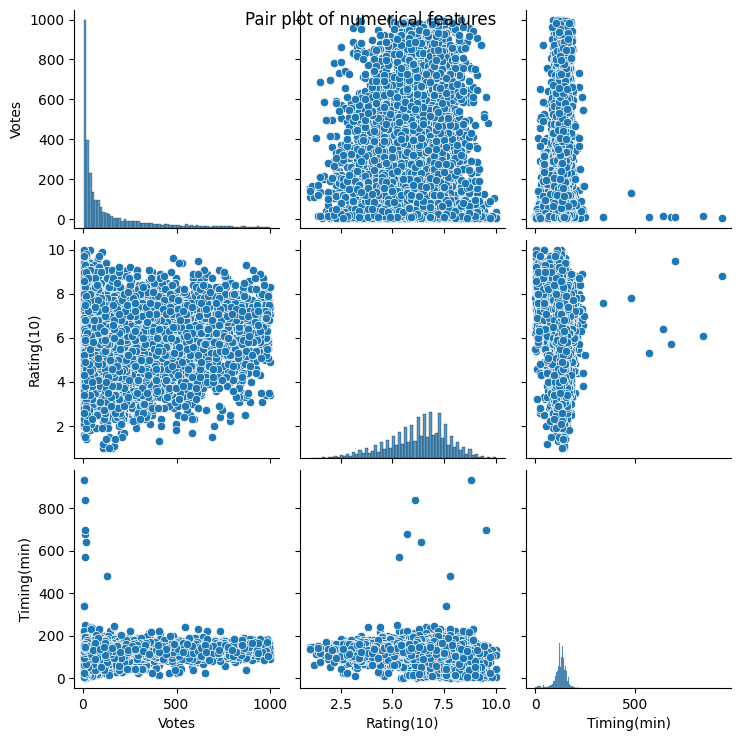

In [25]:
snr.pairplot(data[['Votes','Rating(10)','Timing(min)']])
plt.suptitle("Pair plot of numerical features")
plt.show()